[Watershed 알고리즘을 이용한 이미지 분할](https://github.com/gramman75/opencv/blob/master/doc/27.imageWaterShed/imageWaterShed.rst)사이트를 보고 제작해봄

In [25]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [11]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [12]:
img_path = '/content/drive/MyDrive/COLAB_data/EX-10/1.jpeg'
img = cv2.imread(img_path)

print(img.shape)

(784, 749, 3)


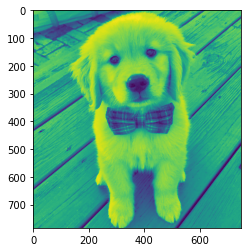

In [15]:
# binaray image로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.show()

#Morphology의 opening, closing을 통해서 노이즈나 Hole제거
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

다음은 전경과 배경을 구분을 해야 합니다. dilate를 이용하여 경계를 확장을 시킵니다. 그러면 서로 연결되지 않은 부분을 배경으로 간주 합니다. 다음은 전경을 찾아야 합니다. 전경은 opning한 결과에 거리 변환함수를 적용합니다. 거리변환 함수를 적용하면 중심으로 부터 skeloton image를 얻을 수 있습니다. 즉, 중심으로 부터 점점 옅어져가는 영상을 파악할 수 있습니다. 그 결과에 threshold를 적용하여 확실한 전경을 찾아 냅니다.

In [16]:
# dilate를 통해서 확실한 Backgroud
sure_bg = cv2.dilate(opening,kernel,iterations=3)

#distance transform을 적용하면 중심으로 부터 Skeleton Image를 얻을 수 있음.
# 즉, 중심으로 부터 점점 옅어져 가는 영상.
# 그 결과에 thresh를 이용하여 확실한 FG를 파악
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

다음은 확실하지 않은 영역을 파악합니다. 이것은 이전에 구한 배경에서 전경을 뺀 영역입니다.

In [17]:
# Background에서 Foregrand를 제외한 영역을 Unknow영역으로 파악
unknown = cv2.subtract(sure_bg, sure_fg)

이제 전경에 labelling작업을 합니다. labelling은 서로 이어져 있는 부분에 라벨을 붙여 서로 동일한 객체라는 것을 구분하기 위함입니다.

In [18]:
# FG에 Labelling작업
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

이제 watershed함수를 적용하고 그 결과값이 -1인 영역이 경계값이 됩니다. 그 부분에 붉은 색을 지정하면 동전의 경계에 붉은 원이 생긴것을 볼 수 있습니다.



In [19]:
# watershed를 적용하고 경계 영역에 색지정
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

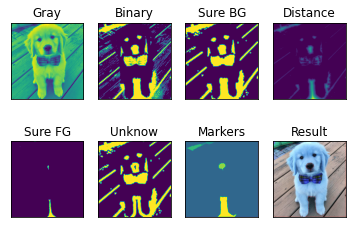

In [24]:
# Result
images = [gray,thresh,sure_bg,  dist_transform, sure_fg, unknown, markers, img]
titles = ['Gray','Binary','Sure BG','Distance','Sure FG','Unknow','Markers','Result']

for i in range(len(images)):
    plt.subplot(2,4,i+1),plt.imshow(images[i]),plt.title(titles[i]),plt.xticks([]),plt.yticks([])

plt.show()

설명이 부족한 것 같다.  
다른 사이트 더 찾아봐야겠다